In [2]:
#Import Library
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Bidirectional 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [3]:
#load dataset after preprocessing
dna = pd.read_csv('d_na_t.csv')
dns = pd.read_csv('d_ns_t.csv')
dsa = pd.read_csv('d_sa_t.csv')
dss = pd.read_csv('d_ss_t.csv')

Epoch 1/100
7/7 [==============================] - 7s 247ms/step - loss: 0.6817 - accuracy: 0.6195 - val_loss: 0.6607 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 40ms/step - loss: 0.6604 - accuracy: 0.6265 - val_loss: 0.6537 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6507 - accuracy: 0.6265 - val_loss: 0.6485 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 36ms/step - loss: 0.6372 - accuracy: 0.6265 - val_loss: 0.6229 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 37ms/step - loss: 0.5736 - accuracy: 0.6265 - val_loss: 0.5376 - val_accuracy: 0.6111
Epoch 6/100
7/7 [==============================] - 0s 37ms/step - loss: 0.4083 - accuracy: 0.7517 - val_loss: 0.6444 - val_accuracy: 0.7778
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.3150 - accuracy: 0.8770 - val_loss: 0.7231 - val_accuracy: 0.6944
Epoch 8/100
7/7 [==

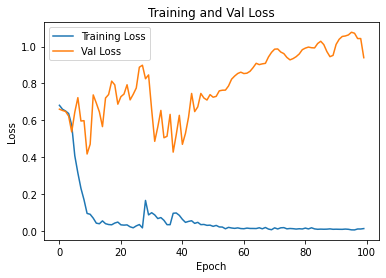

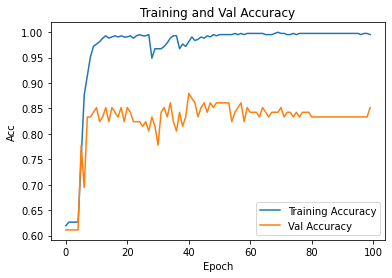

In [3]:
#Model Sentiment with NLTK stopword and Nazief Adriani Stemmer
texts = dna['Ulasan'].astype(str)
labels = dna['Label']

#Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model = Sequential()
model.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model.add(Dropout(0.6))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Bidirectional(LSTM(units = 64)))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

# Compile model
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [8]:
model.save('n_a_t.h5')

Epoch 1/100
7/7 [==============================] - 7s 283ms/step - loss: 0.6809 - accuracy: 0.6032 - val_loss: 0.6581 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6501 - accuracy: 0.6265 - val_loss: 0.6551 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6544 - accuracy: 0.6265 - val_loss: 0.6552 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6399 - accuracy: 0.6265 - val_loss: 0.6375 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 39ms/step - loss: 0.6310 - accuracy: 0.6265 - val_loss: 0.6267 - val_accuracy: 0.6111
Epoch 6/100
7/7 [==============================] - 0s 38ms/step - loss: 0.6145 - accuracy: 0.6334 - val_loss: 0.6005 - val_accuracy: 0.6111
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.5282 - accuracy: 0.6682 - val_loss: 0.5199 - val_accuracy: 0.7037
Epoch 8/100
7/7 [==

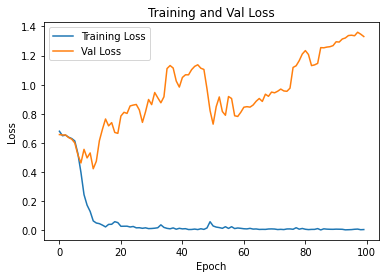

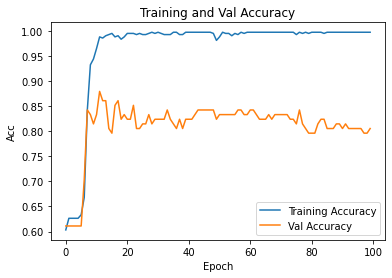

In [4]:
#Model Sentiment with NLTK stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dns['Ulasan'].astype(str)
labels = dns['Label']

#Tokenizer and Pad Sequence
dns_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dns_token.fit_on_texts(texts)
X = dns_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model1 = Sequential()
model1.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model1.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model1.add(Dropout(0.6))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Bidirectional(LSTM(units = 64)))
model1.add(Dropout(0.4))
model1.add(Dense(1, activation='sigmoid'))

# Compile model
model1.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model1.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model1.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model1.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [9]:
model1.save('n_s_t.h5')

Epoch 1/100
7/7 [==============================] - 7s 247ms/step - loss: 0.6793 - accuracy: 0.6079 - val_loss: 0.6569 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 41ms/step - loss: 0.6506 - accuracy: 0.6265 - val_loss: 0.6480 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 39ms/step - loss: 0.6449 - accuracy: 0.6265 - val_loss: 0.6414 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 34ms/step - loss: 0.6429 - accuracy: 0.6265 - val_loss: 0.6363 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 34ms/step - loss: 0.6237 - accuracy: 0.6265 - val_loss: 0.6088 - val_accuracy: 0.6111
Epoch 6/100
7/7 [==============================] - 0s 39ms/step - loss: 0.5834 - accuracy: 0.6311 - val_loss: 0.5682 - val_accuracy: 0.6296
Epoch 7/100
7/7 [==============================] - 0s 34ms/step - loss: 0.4973 - accuracy: 0.6984 - val_loss: 0.4856 - val_accuracy: 0.7870
Epoch 8/100
7/7 [==

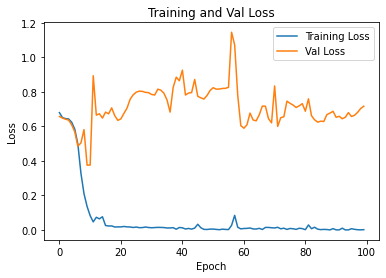

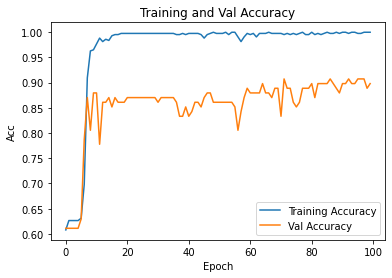

In [5]:
#Model Sentiment with Sastrawi stopword and Nazief Adriani Stemmer
texts = dsa['Ulasan']
labels = dsa['Label']

#Tokenizer and Pad Sequence
dsa_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dsa_token.fit_on_texts(texts)
X = dsa_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model2 = Sequential()
model2.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model2.add(Bidirectional(LSTM(units = 64, dropout = 0.2, return_sequences = True)))
model2.add(Dropout(0.6))
model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(32, activation='relu'))
model2.add(Bidirectional(LSTM(units = 32)))
model2.add(Dropout(0.4))
model2.add(Dense(1, activation='sigmoid'))

# Compile model
model2.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model2.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model2.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [10]:
model2.save('s_a_t.h5')

Epoch 1/100
7/7 [==============================] - 7s 256ms/step - loss: 0.6730 - accuracy: 0.6218 - val_loss: 0.6507 - val_accuracy: 0.6111
Epoch 2/100
7/7 [==============================] - 0s 42ms/step - loss: 0.6521 - accuracy: 0.6265 - val_loss: 0.6489 - val_accuracy: 0.6111
Epoch 3/100
7/7 [==============================] - 0s 39ms/step - loss: 0.6450 - accuracy: 0.6265 - val_loss: 0.6374 - val_accuracy: 0.6111
Epoch 4/100
7/7 [==============================] - 0s 37ms/step - loss: 0.6255 - accuracy: 0.6265 - val_loss: 0.6154 - val_accuracy: 0.6111
Epoch 5/100
7/7 [==============================] - 0s 38ms/step - loss: 0.5976 - accuracy: 0.6265 - val_loss: 0.5745 - val_accuracy: 0.6204
Epoch 6/100
7/7 [==============================] - 0s 37ms/step - loss: 0.4931 - accuracy: 0.7123 - val_loss: 0.4751 - val_accuracy: 0.8056
Epoch 7/100
7/7 [==============================] - 0s 36ms/step - loss: 0.3348 - accuracy: 0.8817 - val_loss: 0.6800 - val_accuracy: 0.7130
Epoch 8/100
7/7 [==

7/7 [==============================] - 0s 37ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7071 - val_accuracy: 0.8796
Epoch 60/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7298 - val_accuracy: 0.8704
Epoch 61/100
7/7 [==============================] - 0s 36ms/step - loss: 5.7997e-04 - accuracy: 1.0000 - val_loss: 0.7401 - val_accuracy: 0.8704
Epoch 62/100
7/7 [==============================] - 0s 36ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.7456 - val_accuracy: 0.8796
Epoch 63/100
7/7 [==============================] - 0s 38ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.7593 - val_accuracy: 0.8704
Epoch 64/100
7/7 [==============================] - 0s 43ms/step - loss: 4.1425e-04 - accuracy: 1.0000 - val_loss: 0.7660 - val_accuracy: 0.8704
Epoch 65/100
7/7 [==============================] - 0s 38ms/step - loss: 5.3899e-04 - accuracy: 1.0000 - val_loss: 0.7723 - val_accuracy: 0.8704
Epoch 66/100
7

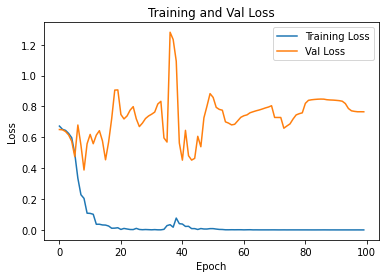

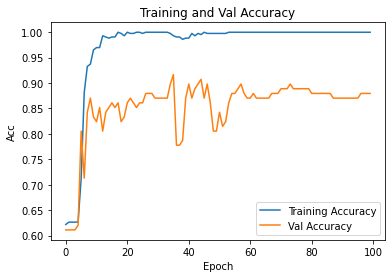

In [4]:
#Model Sentiment with Sastrawi stopword and Snowball Indonesia (Porter 2) Stemmer
texts = dss['Ulasan']
labels = dss['Label']

#Tokenizer and Pad Sequence
dna_token = Tokenizer(num_words=10000, oov_token='<OOV>')
dna_token.fit_on_texts(texts)
X = dna_token.texts_to_sequences(texts)
X = pad_sequences(X, maxlen=50, padding='post')
y = labels
le = LabelEncoder()
y = le.fit_transform(y)
inputembedd = len(dna_token.word_index) + 1

#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify = y,  random_state=42)

#Define LSTM model
model3 = Sequential()
model3.add(Embedding(input_dim = inputembedd, input_length = 50, output_dim = 50))
model3.add(Bidirectional(LSTM(units = 128, dropout = 0.2, return_sequences = True)))
model3.add(Dropout(0.6))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(32, activation='relu'))
model3.add(Bidirectional(LSTM(units = 64)))
model3.add(Dropout(0.4))
model3.add(Dense(1, activation='sigmoid'))

# Compile model
model3.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# Train model
history = model3.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=64)

# Evaluate model on test set
loss, accuracy = model3.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

y_pred = model3.predict(X_test)
y_pred = np.round(y_pred).astype(int)
report = classification_report(y_test, y_pred)
print(report)

cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot grafik
train_loss = history.history['loss']
ac = history.history['val_loss']
plt.plot(train_loss, label='Training Loss')
plt.plot(ac, label='Val Loss')
plt.title('Training and Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
train_loss = history.history['accuracy']
ac = history.history['val_accuracy']
plt.plot(train_loss, label='Training Accuracy')
plt.plot(ac, label='Val Accuracy')
plt.title('Training and Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Acc')
plt.legend()
plt.show()

In [5]:
model3.save('s_s_t.h5')